# Cloudflare Stock Analysis 

## Idea: 
1. Incredible fall in short time-period despite okay quarter 
    - potentially an overreaction    

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import sklearn as sklm
from datetime import datetime 
from datetime import date
import warnings 
warnings.filterwarnings("ignore")

C:\Users\bchan\AppData\Local\Temp\ipykernel_23764\3225796608.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
cfdata = pd.read_csv("https://raw.githubusercontent.com/BrandonYChan/Investment/main/stock_csv/NET.csv")
cfdata['Date'] = pd.to_datetime(cfdata['Date']) 
cfdata['Date Ordinal'] = cfdata['Date'].apply(lambda x:x.toordinal())
cfdata

,Date,Open,High,Low,Close,Adj Close,Volume,Date Ordinal
0,2019-09-13,18.000000,19.410000,17.500000,18.000000,18.000000,35993700,737315
1,2019-09-16,18.600000,19.549999,18.299999,18.629999,18.629999,9758100,737318
2,2019-09-17,18.450001,18.900000,18.200001,18.750000,18.750000,3170900,737319
3,2019-09-18,18.830000,19.700001,18.629999,19.590000,19.590000,4702500,737320
4,2019-09-19,20.000000,20.480000,18.309999,18.750000,18.750000,8514900,737321
...,...,...,...,...,...,...,...,...
1163,2024-04-29,88.900002,91.019997,88.500000,89.650002,89.650002,3444400,739005
1164,2024-04-30,89.260002,91.589996,87.320000,87.400002,87.400002,4184300,739006
1165,2024-05-01,88.120003,90.820000,86.510002,88.040001,88.040001,2802600,739007
1166,2024-05-02,89.430000,89.500000,85.320000,88.970001,88.970001,7684900,739008


## 5 Year Trend 
Brief Overview

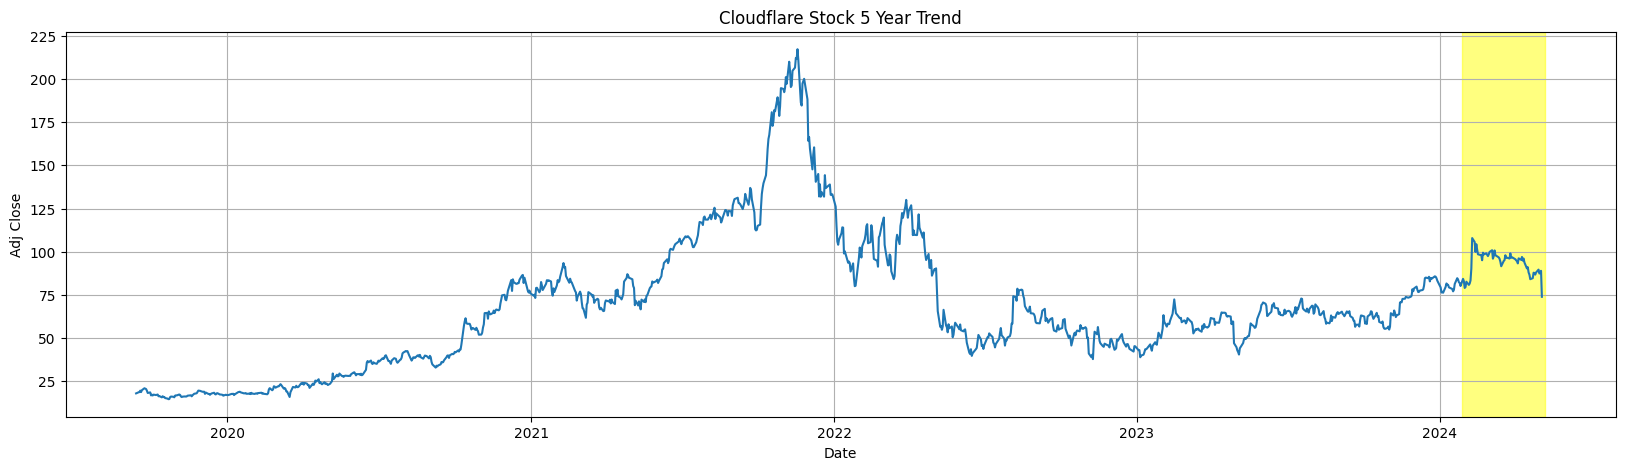

In [ ]:
# 5 Year time series 
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(cfdata, x='Date', y='Adj Close')
plt.grid()
plt.title("Cloudflare Stock 5 Year Trend") 
plt.axvspan(19750, 19850, color='yellow', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'General Increase and Quick Drop Recently')

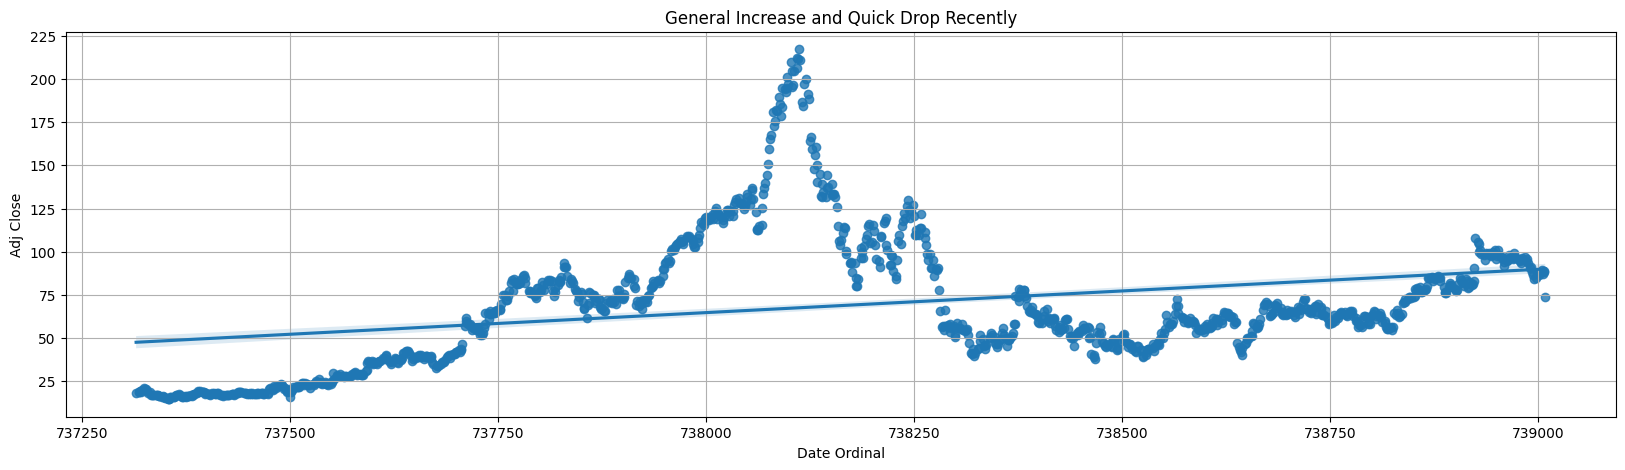

In [ ]:
# 5 Year plot with linear regression line 
fig, ax = plt.subplots(figsize = (20, 5))
sns.regplot(cfdata, x='Date Ordinal', y='Adj Close')
plt.grid()
plt.title("General Increase and Quick Drop Recently")

## Current Price Prediction (Linear Regression)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cfdata[['Date Ordinal']],cfdata['Adj Close'], test_size=0.1, random_state=0)
linear_model = LinearRegression() 
linear_model.fit(X_train, y_train) 

# Predicting current stock price 
pred_curr = round(linear_model.predict([cfdata.tail(1)['Date Ordinal'].values])[0], 2)
curr = round(cfdata.tail(1)['Adj Close'].values[0], 2)
pred_pct_curr = round((pred_curr-curr)/curr*100,2)
print(f"Current price prediction is about ${pred_curr}, {pred_pct_curr}% {'higher' if pred_curr > curr else 'lower'} than the true price ${curr}.")

# Evaluating the model 
model_rmse = round(sklm.metrics.root_mean_squared_error(y_test, linear_model.predict(X_test)), 2) 
avg_price = np.mean(cfdata['Adj Close'])
avg_pct_rmse = round((model_rmse/avg_price)*100, 2)
print(f"Average prediction is off by about ${model_rmse}, or about {avg_pct_rmse}% of the average stock price.")
print(f"So basically the model kind of sucks.") 

Current price prediction is about $90.11, 21.9% higher than the true price $73.92.
Average prediction is off by about $35.61, or about 51.75% of the average stock price.
So basically the model kind of sucks.
